In [235]:
cd("/change-to-brml.jl-full-path");
using Lexicon;
using brml;

The domain for visible states: $V = \{1, 2, 3, 4, 5\}$  <br/>
The domain for hidden states: $H = \{1, 2, 3, 4, 5, 6, 7, 8, 9, 10\}$ <br/>
The number of timesteps: $T = 20$

In [236]:
V = 5  # number of visible states
H = 10 # number of hidden states
T = 20 # number of timesteps

20

Initialize the time-series vectors **h, v** for the hidden and visible variables

In [237]:
h = zeros(Int64,1,T) # holds the state value for the hidden variable at a specific timestep
v = zeros(Int64,1,T) # holds the state value for the visible variable at a specific timestep

1x20 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

The probabilities for the hidden variable states at timestep 1: $p(h_{1})$ 

In [238]:
ph1 = condp(rand(H,1)) # probabilities for the states of the hidden variable at timestep 1

10x1 Array{Float64,2}:
 0.0722447
 0.202653 
 0.0865367
 0.137265 
 0.0442704
 0.0979042
 0.103764 
 0.123422 
 0.101669 
 0.030272 

Initialize the transition matrix **$phghm_{10x10}$** with
$$\begin{eqnarray}
  phghm(i, j) = p(h_t = i | h_{t-1} = j) \\
  \sum_{i = 1}^{10} phghm(i, j) = 1
 \end{eqnarray}
$$

In [239]:
phghm=condp(eye(H,H)) # transition matrix with sum(phghm, 1) = 1 with phghm[i, j] = p(hg=i | hm=j), hg @t, hm @t-1
# shuffle the column data in phghm while keeping sum(phghm, 1) = 1
# done as below no 2 columns have value 1.0 on the same row
phghmtmp=condp(eye(H,H))
r = randperm(H)
for (i, value) in enumerate(r)
    phghm[:, i] = phghmtmp[:, value]
end
phghm

10x10 Array{Float64,2}:
 2.22507e-308  2.22507e-308  1.0           …  2.22507e-308  2.22507e-308
 1.0           2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  1.0         
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308  …  2.22507e-308  2.22507e-308
 2.22507e-308  1.0           2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     1.0           2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308

Initialize the emission matrix **$pvgh_{5x10}$** with
$$\begin{eqnarray}
  pvgh(i, j) = p(v_t = i | h_{t} = j) \\
  \sum_{i = 1}^{5} pvgh(i, j) = 1
 \end{eqnarray}
$$

In [240]:
pvgh=condp((rand(V,H))) # emision matrix with sum(pvgh, 1) = 1 with pvgh[i, j] = p(vg = i | h = j), vg, h @ t

5x10 Array{Float64,2}:
 0.173829  0.234554   0.175735  0.26851    …  0.106749   0.24563    0.0819659
 0.208401  0.381474   0.122834  0.25862       0.487664   0.203008   0.403071 
 0.222561  0.346394   0.31086   0.176035      0.0248792  0.0501948  0.163545 
 0.210118  0.018554   0.235649  0.0728896     0.0112732  0.331044   0.124329 
 0.185091  0.0190236  0.154922  0.223946      0.369435   0.170123   0.227089 

In [241]:
h[1]=randgen(ph1) # initialize the hidden variable @t=1 with a random state based on ph1 distribution
v[1]=randgen(pvgh[:,h[1]]) # initialize the visible variable @t=1 with a random state based on pvgh( vg | h@t=1)

for t=2:T
    h[t]=randgen(phghm[:,h[t-1]]) # set the hidden variable state @t based on h@t-1 using the transition matrix
    v[t]=randgen(pvgh[:,h[t]]) # set the visible variable state @t based on h@t using the emission matrix
end

In [242]:
alpha, loglik = HMMforward(v, phghm, ph1, pvgh); # filtering
println("Log Likelihood = $loglik")

Log Likelihood = -26.47558987523584


In [243]:
gamma = HMMsmooth(v, phghm, ph1, pvgh, alpha); # smoothing

10x20 Array{Float64,2}:
 6.5615e-8    2.27592e-6   7.94521e-6   …  0.990546     0.000128015
 6.18267e-8   6.5615e-8    2.27592e-6      8.21713e-5   0.990546   
 2.27592e-6   7.94521e-6   8.21713e-5      0.000128015  6.18267e-8 
 0.00769872   6.56304e-6   0.00769872      0.00769872   6.56304e-6 
 0.00152834   0.00152834   0.00152834      0.00152834   0.00152834 
 6.56304e-6   0.00769872   6.56304e-6   …  6.56304e-6   0.00769872 
 0.000128015  6.18267e-8   6.5615e-8       7.94521e-6   8.21713e-5 
 8.21713e-5   0.990546     0.000128015     6.5615e-8    2.27592e-6 
 0.990546     0.000128015  6.18267e-8      2.27592e-6   7.94521e-6 
 7.94521e-6   8.21713e-5   0.990546        6.18267e-8   6.5615e-8  

In [244]:
maxstate, logprob = HMMviterbi(v, phghm, ph1, pvgh)
println("most likely path (viterbi):")
println(maxstate)

most likely path (viterbi):
[9 8 10 3 1 2 7 9 8 10 3 1 2 7 9 8 10 3 1 2]


In [245]:
println("original path (hidden states):")
println(h)

original path (hidden states):
[9 8 10 3 1 2 7 9 8 10 3 1 2 7 9 8 10 3 1 2]


In [246]:
println("original path (visible states):")
println(v)

original path (visible states):
[4 2 2 3 3 1 5 2 5 2 4 3 2 1 2 2 2 3 5 3]


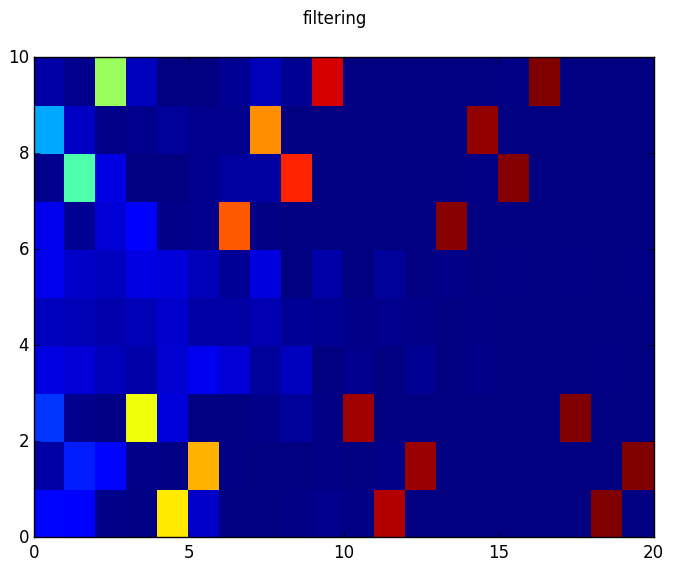

Figure(PyObject <matplotlib.figure.Figure object at 0x11ce4d490>)

In [247]:
PyPlot.pcolor(alpha); PyPlot.suptitle("filtering")
PyPlot.figure()

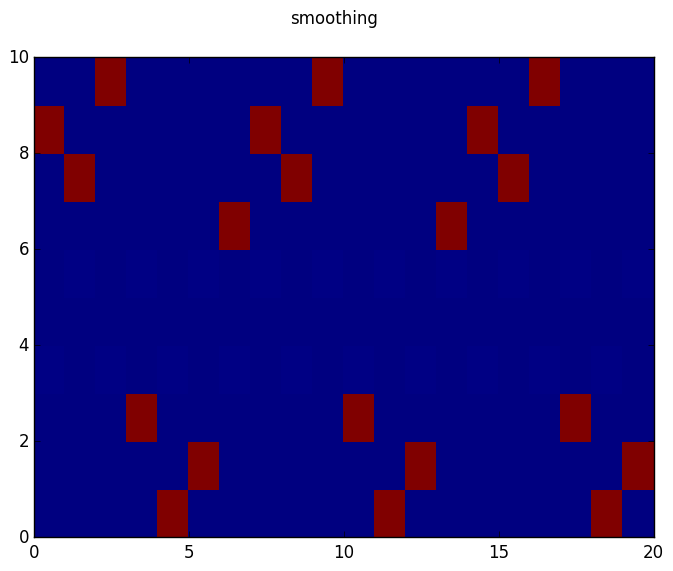

PyObject <matplotlib.text.Text object at 0x11d06ca10>

In [248]:
PyPlot.pcolor(gamma); PyPlot.suptitle("smoothing")

In [249]:
gamma

10x20 Array{Float64,2}:
 6.5615e-8    2.27592e-6   7.94521e-6   …  0.990546     0.000128015
 6.18267e-8   6.5615e-8    2.27592e-6      8.21713e-5   0.990546   
 2.27592e-6   7.94521e-6   8.21713e-5      0.000128015  6.18267e-8 
 0.00769872   6.56304e-6   0.00769872      0.00769872   6.56304e-6 
 0.00152834   0.00152834   0.00152834      0.00152834   0.00152834 
 6.56304e-6   0.00769872   6.56304e-6   …  6.56304e-6   0.00769872 
 0.000128015  6.18267e-8   6.5615e-8       7.94521e-6   8.21713e-5 
 8.21713e-5   0.990546     0.000128015     6.5615e-8    2.27592e-6 
 0.990546     0.000128015  6.18267e-8      2.27592e-6   7.94521e-6 
 7.94521e-6   8.21713e-5   0.990546        6.18267e-8   6.5615e-8  